In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_24532\131226104.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
attack = pd.read_csv('attacks.csv', encoding="cp1252")

In [3]:
attack.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
7161,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
attack.keys()

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
attack.shape

(25723, 24)

In [6]:
from sources.eliminate_duplicates import duplicates_elim as ed

In [7]:
attack_nd = ed(attack)

In [8]:
attack_nd.shape

(6312, 24)

In [9]:
from sources.tresholds import clean_df as cdf

In [10]:
attack_nd2 = cdf(attack, threshold_rows=0.9, threshold_columns=0)

In [11]:
attack_nd2.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
246,2016.07.15.b,15-Jul-2016,2016.0,Unprovoked,USA,California,"Surfside, Orange County",Kite surfing,Lee Frees,M,...,"White shark, 10' to 12'","R. Collier, GSAF",2016.07.15.b-Frees.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.15.b,2016.07.15.b,6057.0,NaN,NaN


In [12]:
columns_to_drop = ['Date', 'Year', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']
attack_clean = attack_nd2.drop(columns=columns_to_drop)

In [13]:
attack_clean.sample()

,Case Number,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
4303,1955.02.06,Unprovoked,USA,California,"Pacific Grove, Monterey County",Spearfishing,James F. Jacobs,M,19,"Swimfin & 2 wool socks removed by shark, suit ...",N,12h00,"White shark, 5 m to 6 m [16.5' to 20]"


In [14]:
column_mapping = {
    'Species ': 'Species',
    'Sex ': 'Sex'}

tiburones = attack_clean.rename(columns=column_mapping)

In [15]:
tiburones.keys()

Index(['Case Number', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species'],
      dtype='object')

In [16]:
tiburones["Fatal (Y/N)"].value_counts()

Fatal (Y/N)
N       1187
Y        232
 N         2
M          1
2017       1
Name: count, dtype: int64

In [17]:
tiburones["Fatal (Y/N)"].replace('M', 'N', inplace=True)
tiburones["Fatal (Y/N)"].replace(' N', 'N', inplace=True)

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_24532\2013021417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tiburones["Fatal (Y/N)"].replace('M', 'N', inplace=True)
C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_24532\2013021417.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [18]:
tiburones["Fatal (Y/N)"].value_counts()

Fatal (Y/N)
N       1190
Y        232
2017       1
Name: count, dtype: int64

In [19]:
tiburones = tiburones[tiburones['Fatal (Y/N)'] != '2017']

In [20]:
tiburones["Fatal (Y/N)"].value_counts()

Fatal (Y/N)
N    1190
Y     232
Name: count, dtype: int64

In [21]:
tiburones.sample()

,Case Number,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
1156,2009.02.12,Unprovoked,AUSTRALIA,New South Wales,"Bondi Beach, Sydney",Surfing,Glen Orgias,M,33,Severe injury to hand,N,19h30,"White shark, 2.5m"


In [22]:
tiburones["Sex"].value_counts()

Sex
M      1228
F       193
lli       1
Name: count, dtype: int64

In [23]:
tiburones = tiburones[tiburones['Sex'] != 'lli']

In [24]:
tiburones["Sex"].value_counts()

Sex
M    1228
F     193
Name: count, dtype: int64

In [25]:
tiburones["Type"].value_counts()

Type
Unprovoked      1288
Provoked         106
Boating           17
Invalid            5
Sea Disaster       5
Name: count, dtype: int64

In [26]:
tiburones["Activity"].value_counts()

Activity
Surfing                                                                     404
Swimming                                                                    194
Spearfishing                                                                100
Wading                                                                       46
Fishing                                                                      45
                                                                           ... 
Scuba diving (submerged riding a scooter)                                     1
Body boarding or surfing                                                      1
Wading / Surfing                                                              1
Body surfing, stood up on sandbar                                             1
Swimming in section of river used for washing clothes & cooking utensils      1
Name: count, Length: 337, dtype: int64

In [27]:
tiburones["Activity"].value_counts()

Activity
Surfing                                                                     404
Swimming                                                                    194
Spearfishing                                                                100
Wading                                                                       46
Fishing                                                                      45
                                                                           ... 
Scuba diving (submerged riding a scooter)                                     1
Body boarding or surfing                                                      1
Wading / Surfing                                                              1
Body surfing, stood up on sandbar                                             1
Swimming in section of river used for washing clothes & cooking utensils      1
Name: count, Length: 337, dtype: int64

In [28]:
actividades_similares = {
    'Boogie boarding': 'Body boarding', 'Boogie Boarding': 'Body boarding', 'Body Boarding': 'Body boarding',
    'Surf skiing': 'Surfing',
    'Windsurfing': 'Surfing',
    'Surfing (sitting on his board)':'Surfing', 'Surf-skiing':'Surfing', 'Surf skiing':'Surfing', 'Body boarding or surfing':'Surfing', 
    'Wading / Surfing':'Surfing', 'Body surfing, stood up on sandbar': 'Body boarding'}

tiburones['Activity'] = tiburones['Activity'].replace(actividades_similares)

In [29]:
tiburones["Activity"].value_counts()

Activity
Surfing                                                                     424
Swimming                                                                    194
Spearfishing                                                                100
Body boarding                                                                52
Wading                                                                       46
                                                                           ... 
Swimming or paddle boarding                                                   1
Scuba diving (submerged riding a scooter)                                     1
Surfing / Swimming                                                            1
Wade fishing                                                                  1
Swimming in section of river used for washing clothes & cooking utensils      1
Name: count, Length: 327, dtype: int64

In [30]:
tiburones["Activity"].nunique()

327

In [31]:
mask = tiburones['Activity'].str.contains('diving', case=False)
tiburones.loc[mask, 'Activity'] = 'Diving'
tiburones['Activity'].value_counts()

Activity
Surfing                                                                     424
Swimming                                                                    194
Diving                                                                      132
Spearfishing                                                                100
Body boarding                                                                52
                                                                           ... 
Lying prone in 2' of water                                                    1
Spearfishing & holding catch                                                  1
Swimming with dolphins                                                        1
Wading in school of baitfish                                                  1
Swimming in section of river used for washing clothes & cooking utensils      1
Name: count, Length: 259, dtype: int64

In [32]:
mask = tiburones['Activity'].str.contains('fishing', case=False)
tiburones.loc[mask, 'Activity'] = 'Fishing'
tiburones['Activity'].value_counts()

Activity
Surfing                                                                     424
Swimming                                                                    194
Fishing                                                                     190
Diving                                                                      132
Body boarding                                                                52
                                                                           ... 
Surfing, lying on surfboard                                                   1
Lying prone in 2' of water                                                    1
Swimming with dolphins                                                        1
Wading in school of baitfish                                                  1
Swimming in section of river used for washing clothes & cooking utensils      1
Name: count, Length: 216, dtype: int64

In [33]:
mask = tiburones['Activity'].str.contains('Paddle', case=False)
tiburones.loc[mask, 'Activity'] = 'Paddle Board'
tiburones['Activity'].value_counts()

Activity
Surfing                                                                     424
Swimming                                                                    194
Fishing                                                                     190
Diving                                                                      132
Body boarding                                                                52
                                                                           ... 
Surfing / Wading                                                              1
Surfing, lying on surfboard                                                   1
Lying prone in 2' of water                                                    1
Swimming with dolphins                                                        1
Swimming in section of river used for washing clothes & cooking utensils      1
Name: count, Length: 211, dtype: int64

In [34]:
palabras_clave = ['surfing', 'Surfing', 'surf', 'Surf', ' Surf', 'Surf ', ' Surfing', 'Surfing ', ' surf', 'surf ', ' surfing', 'surfing ', 'ski']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones['Activity'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones.loc[mask, 'Activity'] = 'Surfing'

# Verifica las actividades actualizadas
tiburones['Activity'].value_counts()

Activity
Surfing                                                                     507
Swimming                                                                    194
Fishing                                                                     190
Diving                                                                      132
Body boarding                                                                52
                                                                           ... 
Wading, when he stepped on the shark                                          1
Swimming (using a float)                                                      1
Swimming with pod of dolphins                                                 1
Swimming, wearing black wetsuit & swim fins                                   1
Swimming in section of river used for washing clothes & cooking utensils      1
Name: count, Length: 159, dtype: int64

In [35]:
palabras_clave_wading = ['Wading', ' Wading', 'Wading ', 'wading', ' wading', 'wading ','Walking']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones['Activity'].str.contains('|'.join(palabras_clave_wading), case=False)

# Reemplaza esos valores con "Diving"
tiburones.loc[mask, 'Activity'] = 'Wading'

# Verifica las actividades actualizadas
tiburones['Activity'].value_counts()

Activity
Surfing                                                                     507
Swimming                                                                    194
Fishing                                                                     190
Diving                                                                      132
Wading                                                                       61
                                                                           ... 
Swimming with pod of dolphins                                                 1
Swimming, wearing black wetsuit & swim fins                                   1
Standing, stepped on shark                                                    1
Swimming, poaching perlemoen                                                  1
Swimming in section of river used for washing clothes & cooking utensils      1
Name: count, Length: 150, dtype: int64

In [36]:
palabras_clave_wading = ['Swimming', ' Swimming', 'Swimming ', 'swimming', ' swimming', 'swimming ', 'Tread', ' Tread', 'Tread ', 'tread',
                         ' tread', 'tread ', 'Treading', ' Treading', 'Treading ', 'chest-deep', 'Step', ' Step', 'Step ', 'Stepping', ' Stepping'
                         'Stepping ', 'step', ' step', 'step ', 'stepping', ' stepping', 'stepping ', 'Bathing', 'bathing', 'shallows',
                         'Jump', 'Jumping', ' Jumping', 'Jumping ', 'jump', 'water', 'Splashing', 'Splashing ','specimens', 'Bending']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones['Activity'].str.contains('|'.join(palabras_clave_wading), case=False)

# Reemplaza esos valores con "Diving"
tiburones.loc[mask, 'Activity'] = 'Swimming'

# Verifica las actividades actualizadas
tiburones['Activity'].value_counts()

Activity
Surfing                                        507
Swimming                                       315
Fishing                                        190
Diving                                         132
Wading                                          61
                                              ... 
Floating near boat & observing bioluminesce      1
Holding onto an inflatable boat                  1
Chumming for white sharks                        1
Snorkeling (filming the sardine run)             1
Washing horses                                   1
Name: count, Length: 70, dtype: int64

In [37]:
palabras_clave_wading = ['Fishing', ' Fishing', 'Fishing ', 'fishing', ' fishing', 'fishing ', 'fish', 'clam', 'clams','Clam','Clams', 'chumming'
                         'Casting a net', 'Working']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones['Activity'].str.contains('|'.join(palabras_clave_wading), case=False)

# Reemplaza esos valores con "Diving"
tiburones.loc[mask, 'Activity'] = 'Fishing'

# Verifica las actividades actualizadas
tiburones['Activity'].value_counts()

Activity
Surfing                                        507
Swimming                                       315
Fishing                                        198
Diving                                         132
Wading                                          61
                                              ... 
Measuring sharks                                 1
Floating near boat & observing bioluminesce      1
Reviving a sedated shark                         1
Holding onto an inflatable boat                  1
Washing horses                                   1
Name: count, Length: 62, dtype: int64

In [38]:
tiburones["Activity"].nunique()

62

In [39]:
print(tiburones['Activity'].value_counts().to_string())

Activity
Surfing                                                                                                                                                      507
Swimming                                                                                                                                                     315
Fishing                                                                                                                                                      198
Diving                                                                                                                                                       132
Wading                                                                                                                                                        61
Body boarding                                                                                                                                                 52
Snorkeling               

In [40]:
pd.set_option('display.max_rows', None)

In [41]:
palabras_clave_wading = ['Paddle', ' Paddle', 'Paddle ', 'paddle', ' paddle', 'paddle ', 'SUP', 'sup', 'Paddling', ' Paddling', 'Paddling '
                         'paddling', ' paddling', 'paddling ']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones['Activity'].str.contains('|'.join(palabras_clave_wading), case=False)

# Reemplaza esos valores con "Diving"
tiburones.loc[mask, 'Activity'] = 'Paddle Board'

# Verifica las actividades actualizadas
tiburones['Activity'].value_counts()

Activity
Surfing                                                                                                                                                      507
Swimming                                                                                                                                                     315
Fishing                                                                                                                                                      198
Diving                                                                                                                                                       132
Wading                                                                                                                                                        61
Body boarding                                                                                                                                                 52
Snorkeling               

In [42]:
palabras_clave_wading = ['Playing', ' Playing', 'Playing ', 'playing', ' playing', 'playing ', 'ball', 'Ball']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones['Activity'].str.contains('|'.join(palabras_clave_wading), case=False)

# Reemplaza esos valores con "Diving"
tiburones.loc[mask, 'Activity'] = 'Playing'

# Verifica las actividades actualizadas
tiburones['Activity'].value_counts()

Activity
Surfing                                                                                                                                                      507
Swimming                                                                                                                                                     315
Fishing                                                                                                                                                      198
Diving                                                                                                                                                       132
Wading                                                                                                                                                        61
Body boarding                                                                                                                                                 52
Snorkeling               

In [43]:
palabras_clave_wading = ['Rescue', ' Rescue', 'Rescue ', 'rescue', ' rescue', 'rescue ', 'rescuing', 'Rescuing', 'help', ' help', 'help ', 
                         'helping', ' helping', 'helping ', 'Lifesaving']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones['Activity'].str.contains('|'.join(palabras_clave_wading), case=False)

# Reemplaza esos valores con "Diving"
tiburones.loc[mask, 'Activity'] = 'Rescuing'

# Verifica las actividades actualizadas
tiburones['Activity'].value_counts()

Activity
Surfing                                                                   507
Swimming                                                                  315
Fishing                                                                   198
Diving                                                                    132
Wading                                                                     61
Body boarding                                                              52
Snorkeling                                                                 35
Standing                                                                   33
Paddle Board                                                               19
Kayaking                                                                   13
Rescuing                                                                    7
Floating                                                                    5
Playing                                                

In [44]:
tiburones["Activity"].nunique()

52

In [45]:
palabras_clave_wading = ['Diving', ' Diving', 'Diving ', 'diving', ' diving', 'diving ', 'Scuba', 'scuba', ' Scuba', ' scuba', 'Scuba ',
                         'scuba ', 'Snorkeling', 'snorkeling']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones['Activity'].str.contains('|'.join(palabras_clave_wading), case=False)

# Reemplaza esos valores con "Diving"
tiburones.loc[mask, 'Activity'] = 'Diving'

# Verifica las actividades actualizadas
tiburones['Activity'].value_counts()

Activity
Surfing                                                                   507
Swimming                                                                  315
Fishing                                                                   198
Diving                                                                    169
Wading                                                                     61
Body boarding                                                              52
Standing                                                                   33
Paddle Board                                                               19
Kayaking                                                                   13
Rescuing                                                                    7
Floating                                                                    5
Playing                                                                     5
Feeding mullet to sharks                               

In [46]:
palabras_clave_wading = ['Floating', 'floating', 'Holding', 'holding','floatation']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones['Activity'].str.contains('|'.join(palabras_clave_wading), case=False)

# Reemplaza esos valores con "Diving"
tiburones.loc[mask, 'Activity'] = 'Floating'

# Verifica las actividades actualizadas
tiburones['Activity'].value_counts()

Activity
Surfing                                                                   507
Swimming                                                                  315
Fishing                                                                   198
Diving                                                                    169
Wading                                                                     61
Body boarding                                                              52
Standing                                                                   33
Paddle Board                                                               19
Kayaking                                                                   13
Floating                                                                   13
Rescuing                                                                    7
Playing                                                                     5
Cleaning hull of ship                                  

In [47]:
palabras_clave_wading = ['shark', 'Shark','horses']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones['Activity'].str.contains('|'.join(palabras_clave_wading), case=False)

# Reemplaza esos valores con "Diving"
tiburones.loc[mask, 'Activity'] = 'Disturbing the animal'

# Verifica las actividades actualizadas
tiburones['Activity'].value_counts()

Activity
Surfing                                                             507
Swimming                                                            315
Fishing                                                             198
Diving                                                              169
Wading                                                               61
Body boarding                                                        52
Standing                                                             33
Paddle Board                                                         19
Kayaking                                                             13
Floating                                                             13
Disturbing the animal                                                12
Rescuing                                                              7
Playing                                                               5
Dived overboard to check propeller of US Navy motor tor

In [48]:
palabras_clave_wading = ['Kayaking', 'kayaking', 'Rowing', 'rowing','Kayaking ','Canoeing']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones['Activity'].str.contains('|'.join(palabras_clave_wading), case=False)

# Reemplaza esos valores con "Diving"
tiburones.loc[mask, 'Activity'] = 'Kayaking'

# Verifica las actividades actualizadas
tiburones['Activity'].value_counts()

Activity
Surfing                                                             507
Swimming                                                            315
Fishing                                                             198
Diving                                                              169
Wading                                                               61
Body boarding                                                        52
Standing                                                             33
Paddle Board                                                         19
Kayaking                                                             16
Floating                                                             13
Disturbing the animal                                                12
Rescuing                                                              7
Playing                                                               5
Dived overboard to check propeller of US Navy motor tor

In [49]:
palabras_clave_wading = ['Fell', 'overboard', 'ship', 'raft', 'Falling ', 'Towing']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones['Activity'].str.contains('|'.join(palabras_clave_wading), case=False)

# Reemplaza esos valores con "Diving"
tiburones.loc[mask, 'Activity'] = 'Falling from boat'

# Verifica las actividades actualizadas
tiburones['Activity'].value_counts()

Activity
Surfing                  507
Swimming                 315
Fishing                  198
Diving                   169
Wading                    61
Body boarding             52
Standing                  33
Paddle Board              19
Kayaking                  16
Floating                  13
Disturbing the animal     12
Rescuing                   7
Playing                    5
Falling from boat          5
Kite Boarding              1
Body-boarding              1
Wakeboarding               1
Body boarding              1
Bodyboarding               1
Kite boarding              1
Casting a net              1
Kiteboarding               1
Standing on sandbar        1
Name: count, dtype: int64

In [50]:
palabras_clave_wading = ['Kite', 'Kiteboarding']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones['Activity'].str.contains('|'.join(palabras_clave_wading), case=False)

# Reemplaza esos valores con "Diving"
tiburones.loc[mask, 'Activity'] = 'Kite Boarding'

# Verifica las actividades actualizadas
tiburones['Activity'].value_counts()

Activity
Surfing                  507
Swimming                 315
Fishing                  198
Diving                   169
Wading                    61
Body boarding             52
Standing                  33
Paddle Board              19
Kayaking                  16
Floating                  13
Disturbing the animal     12
Rescuing                   7
Playing                    5
Falling from boat          5
Kite Boarding              3
Body boarding              1
Casting a net              1
Bodyboarding               1
Wakeboarding               1
Body-boarding              1
Standing on sandbar        1
Name: count, dtype: int64

In [51]:
palabras_clave_wading = ['Body boarding', 'Body-boarding', 'Bodyboarding', 'Wakeboarding', 'Body boarding ']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones['Activity'].str.contains('|'.join(palabras_clave_wading), case=False)

# Reemplaza esos valores con "Diving"
tiburones.loc[mask, 'Activity'] = 'Body boarding'

# Verifica las actividades actualizadas
tiburones['Activity'].value_counts()

Activity
Surfing                  507
Swimming                 315
Fishing                  198
Diving                   169
Wading                    61
Body boarding             56
Standing                  33
Paddle Board              19
Kayaking                  16
Floating                  13
Disturbing the animal     12
Rescuing                   7
Playing                    5
Falling from boat          5
Kite Boarding              3
Casting a net              1
Standing on sandbar        1
Name: count, dtype: int64

In [52]:
activity_counts = tiburones["Activity"].value_counts()

valid_times = activity_counts[activity_counts > 1].index

tiburones_act = tiburones[tiburones["Activity"].isin(valid_times)]

In [53]:
tiburones_act['Activity'].value_counts()

Activity
Surfing                  507
Swimming                 315
Fishing                  198
Diving                   169
Wading                    61
Body boarding             56
Standing                  33
Paddle Board              19
Kayaking                  16
Floating                  13
Disturbing the animal     12
Rescuing                   7
Playing                    5
Falling from boat          5
Kite Boarding              3
Name: count, dtype: int64

In [54]:
tiburones_act.sample()

,Case Number,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
4595,1946.08.18,Unprovoked,AUSTRALIA,Queensland,"Ellis Beach, 20 miles from Cairns",Swimming,Phillip South Collin,M,30,"FATAL, body not recovered",Y,15h20,4.3 m [14'] shark


In [55]:
tiburones_act['Fatal (Y/N)'].value_counts()

Fatal (Y/N)
N    1187
Y     232
Name: count, dtype: int64

In [56]:
tiburones_act['Type'].value_counts()

Type
Unprovoked      1286
Provoked         106
Boating           17
Invalid            5
Sea Disaster       5
Name: count, dtype: int64

In [57]:
tiburones_act['Case Number'].value_counts()

Case Number
2013.10.05       2
2018.06.25       1
1988.10.11       1
1989.01.03       1
1989.01.26.a     1
1989.02.02       1
1989.03.09       1
1989.06.03       1
1989.06.05       1
1989.07.20       1
1989.08.13       1
1989.08.22.a     1
1989.08.29       1
1989.09.09.b     1
1989.09.13       1
1989.09.17       1
1989.10.11       1
1989.10.22       1
1989.11.18       1
1990.04.09       1
1990.04.14       1
1988.10.23       1
1988.10.10       1
1990.06.24       1
1987.12.17       1
1987.07.12.a     1
1987.07.12.b     1
1987.07.21       1
1987.08.15       1
1987.08.20       1
1987.09.13       1
1987.10.11       1
1987.10.26       1
1988.01.06       1
1988.09.28       1
1988.02.13       1
1988.02.14       1
1988.03.16       1
1988.06.01       1
1988.06.09       1
1988.06.19       1
1988.08.11       1
1988.09.13.a     1
1990.05.06       1
1990.08.28       1
1987.01.28       1
1992.04.09       1
1991.11.26.b     1
1991.12.04       1
1992.01.08       1
1992.01.23       1
1992.01.29.a     1


In [58]:
tiburones_act[['Year', 'Month', 'Day']] = tiburones_act['Case Number'].str.extract(r'^(\d+)\.(\d+).(\d+)[^.]*$')

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_24532\2469115549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiburones_act[['Year', 'Month', 'Day']] = tiburones_act['Case Number'].str.extract(r'^(\d+)\.(\d+).(\d+)[^.]*$')
C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_24532\2469115549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiburones_act[['Year', 'Month', 'Day']] = tiburones_act['Case Number'].str.extract(r'^(\d+)\.(\d+).(\d+)[^.]*$')
C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_2453

In [59]:
tiburones_act.sample()

,Case Number,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Year,Month,Day
2965,1982.09.19,Unprovoked,USA,California,"Bear Harbor, Mendocino County",Diving,Michael J. Herder,M,28,Upper left thigh & buttocks bitten,N,14h30,5 m to 6 m [16.5' to 20'] white shark,1982,09,19


In [60]:
tiburones_act = tiburones_act.drop(columns=['Case Number'])

In [61]:
tiburones_act.sample()

,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Year,Month,Day
1470,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Elizabeth Schelk,F,22,2-inch puncture wounds on right foot,N,13h00,Possibly a 1' to 3' blacktip or spinner shark,2006,06,20


In [62]:
tiburones_act.shape

(1419, 15)

In [63]:
tiburones_act['Species'].nunique()

809

In [64]:
tiburones_act['Species'].value_counts()

Species
White shark                                                                                                                                                              74
Tiger shark                                                                                                                                                              34
4' shark                                                                                                                                                                 33
Bull shark                                                                                                                                                               31
1.8 m [6'] shark                                                                                                                                                         19
4' to 5' shark                                                                                                                      

In [65]:
regex_spec = r'^([^,]+)'
tiburones_act['Species'] = tiburones_act['Species'].str.extract(regex_spec)

In [66]:
tiburones_act['Species'].value_counts()

Species
White shark                                                                                                                                                              230
Tiger shark                                                                                                                                                              129
Bull shark                                                                                                                                                                67
4' shark                                                                                                                                                                  33
Bronze whaler shark                                                                                                                                                       26
Raggedtooth shark                                                                                                              

In [67]:
tiburones_act.dropna(subset=['Species'], inplace=True)

In [68]:
tiburones_act.shape

(1418, 15)

In [69]:
tiburones_act['Species'].nunique()

462

In [70]:
palabras_clave = ['white shark', 'white', 'White shark', 'White']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_act['Species'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_act.loc[mask, 'Species'] = 'White shark'

# Verifica las actividades actualizadas
tiburones_act['Species'].value_counts()

Species
White shark                                                                                                                                                              376
Tiger shark                                                                                                                                                              129
Bull shark                                                                                                                                                                67
4' shark                                                                                                                                                                  33
Bronze whaler shark                                                                                                                                                       26
Raggedtooth shark                                                                                                              

In [71]:
palabras_clave = ['Grey nurse shark', 'nurse', 'Nurse']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_act['Species'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_act.loc[mask, 'Species'] = 'Nurse shark'

# Verifica las actividades actualizadas
tiburones_act['Species'].value_counts()

Species
White shark                                                                                                                                                              376
Tiger shark                                                                                                                                                              129
Bull shark                                                                                                                                                                67
Nurse shark                                                                                                                                                               36
4' shark                                                                                                                                                                  33
Bronze whaler shark                                                                                                            

In [72]:
palabras_clave = ['Hammerhead', 'hammerhead', 'hammer']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_act['Species'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_act.loc[mask, 'Species'] = 'Hammerhead shark'

# Verifica las actividades actualizadas
tiburones_act['Species'].value_counts()

Species
White shark                                                                                                                                                              376
Tiger shark                                                                                                                                                              129
Bull shark                                                                                                                                                                67
Nurse shark                                                                                                                                                               36
4' shark                                                                                                                                                                  33
Bronze whaler shark                                                                                                            

In [73]:
palabras_clave = ['Bull', 'bull', 'bullshark', 'Bullshark']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_act['Species'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_act.loc[mask, 'Species'] = 'Bull shark'

# Verifica las actividades actualizadas
tiburones_act['Species'].value_counts()

Species
White shark                                                                                                                                                              376
Tiger shark                                                                                                                                                              129
Bull shark                                                                                                                                                               107
Nurse shark                                                                                                                                                               36
4' shark                                                                                                                                                                  33
Bronze whaler shark                                                                                                            

In [74]:
palabras_clave = ['Tiger', 'tiger', 'tigershark', 'Tigershark']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_act['Species'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_act.loc[mask, 'Species'] = 'Tiger shark'

# Verifica las actividades actualizadas
tiburones_act['Species'].value_counts()

Species
White shark                                                                                                                                                              376
Tiger shark                                                                                                                                                              146
Bull shark                                                                                                                                                               107
Nurse shark                                                                                                                                                               36
4' shark                                                                                                                                                                  33
Bronze whaler shark                                                                                                            

In [75]:
palabras_clave = ['Whaler', 'whaler', 'whalershark', 'Whalershark', 'copper', 'Copper','coppershark','Coppershark']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_act['Species'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_act.loc[mask, 'Species'] = 'Whaler shark'

# Verifica las actividades actualizadas
tiburones_act['Species'].value_counts()

Species
White shark                                                                                                                                                              376
Tiger shark                                                                                                                                                              146
Bull shark                                                                                                                                                               107
Whaler shark                                                                                                                                                              36
Nurse shark                                                                                                                                                               36
4' shark                                                                                                                       

In [76]:
palabras_clave = ['Blacktip', 'blacktip', 'blacktipshark', 'Blacktipshark']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_act['Species'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_act.loc[mask, 'Species'] = 'Blacktip shark'

# Verifica las actividades actualizadas
tiburones_act['Species'].value_counts()

Species
White shark                                                                                                                                                              376
Tiger shark                                                                                                                                                              146
Bull shark                                                                                                                                                               107
Blacktip shark                                                                                                                                                            60
Nurse shark                                                                                                                                                               36
Whaler shark                                                                                                                   

In [77]:
palabras_clave = ['Raggedtooth', 'raggedtooth', 'raggedtoothshark', 'Raggedtoothshark']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_act['Species'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_act.loc[mask, 'Species'] = 'Raggedtooth shark'

# Verifica las actividades actualizadas
tiburones_act['Species'].value_counts()

Species
White shark                                                                                                                                                              376
Tiger shark                                                                                                                                                              146
Bull shark                                                                                                                                                               107
Blacktip shark                                                                                                                                                            60
Whaler shark                                                                                                                                                              36
Nurse shark                                                                                                                    

In [78]:
palabras_clave = ['Mako', 'mako', 'makoshark', 'Makoshark']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_act['Species'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_act.loc[mask, 'Species'] = 'Mako shark'

# Verifica las actividades actualizadas
tiburones_act['Species'].value_counts()

Species
White shark                                                                                                                                                              376
Tiger shark                                                                                                                                                              146
Bull shark                                                                                                                                                               107
Blacktip shark                                                                                                                                                            60
Whaler shark                                                                                                                                                              36
Nurse shark                                                                                                                    

In [79]:
palabras_clave = ['Wobbegong', 'wobbegong', 'wobbegongshark', 'Wobbegongshark']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_act['Species'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_act.loc[mask, 'Species'] = 'Wobbegong shark'

# Verifica las actividades actualizadas
tiburones_act['Species'].value_counts()

Species
White shark                                                                                                                                                              376
Tiger shark                                                                                                                                                              146
Bull shark                                                                                                                                                               107
Blacktip shark                                                                                                                                                            60
Whaler shark                                                                                                                                                              36
Nurse shark                                                                                                                    

In [80]:
palabras_clave = ['Zambesi', 'zambesi', 'zambesishark', 'Zambesishark']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_act['Species'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_act.loc[mask, 'Species'] = 'Zambesi shark'

# Verifica las actividades actualizadas
tiburones_act['Species'].value_counts()

Species
White shark                                                                                                                                                              376
Tiger shark                                                                                                                                                              146
Bull shark                                                                                                                                                               107
Blacktip shark                                                                                                                                                            60
Whaler shark                                                                                                                                                              36
Nurse shark                                                                                                                    

In [81]:
palabras_clave = ['Lemon', 'lemon', 'lemonshark', 'Lemonshark']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_act['Species'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_act.loc[mask, 'Species'] = 'Lemon shark'

# Verifica las actividades actualizadas
tiburones_act['Species'].value_counts()

Species
White shark                                                                                                                                                              376
Tiger shark                                                                                                                                                              146
Bull shark                                                                                                                                                               107
Blacktip shark                                                                                                                                                            60
Whaler shark                                                                                                                                                              36
Nurse shark                                                                                                                    

In [82]:
# Lista de las 12 especies claras
especies_claras = ['White shark', 'Tiger shark', 'Bull shark', 'Blacktip shark', 'Whaler shark', 'Nurse shark', 'Raggedtooth shark', 'Mako shark',
                   'Hammerhead shark', 'Zambesi shark', 'Wobbegong shark', 'Lemon shark']

# Filtrar el DataFrame para mantener solo las filas que contienen estas especies
tiburones_spec = tiburones_act[tiburones_act['Species'].isin(especies_claras)]

# Verificar los resultados
print(tiburones_spec['Species'].value_counts())

Species
White shark          376
Tiger shark          146
Bull shark           107
Blacktip shark        60
Nurse shark           36
Whaler shark          36
Raggedtooth shark     25
Mako shark            18
Hammerhead shark      16
Zambesi shark         15
Wobbegong shark       13
Lemon shark            8
Name: count, dtype: int64


In [83]:
tiburones_spec.shape

(856, 15)

In [84]:
tiburones_spec.sample()

,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Year,Month,Day
3343,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Kosi Bay,Swimming,Janie Pelser,F,30,Foot bitten,N,20h00,Zambesi shark,NaN,NaN,NaN


In [85]:
tiburones_spec['Injury'].value_counts()

Injury
FATAL                                                                                                                                                     81
Leg bitten                                                                                                                                                15
No injury, board bitten                                                                                                                                   13
Foot bitten                                                                                                                                                9
No injury                                                                                                                                                  7
Calf bitten                                                                                                                                                6
FATAL, body not recovered                          

In [86]:
tiburones_spec['Injury'].nunique()

650

In [87]:
palabras_clave = ['FATAL', 'Fatal', 'fatal', 'dead', 'Death', 'rammed', 'drowned']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_spec['Injury'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_spec.loc[mask, 'Injury'] = 'Fatal'

# Verifica las actividades actualizadas
tiburones_spec['Injury'].value_counts()

Injury
Fatal                                                                                                                                        181
Leg bitten                                                                                                                                    15
No injury, board bitten                                                                                                                       13
Foot bitten                                                                                                                                    9
No injury                                                                                                                                      7
Calf bitten                                                                                                                                    6
No injury, surfboard bitten                                                                                                

In [88]:
palabras_clave = ['No injury', 'No Injury', 'no injury', 'no', 'No', 'Unharmed','Survived','survived']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_spec['Injury'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_spec.loc[mask, 'Injury'] = 'Unharmed'

# Verifica las actividades actualizadas
tiburones_spec['Injury'].value_counts()

Injury
Fatal                                                                                                                           181
Unharmed                                                                                                                        138
Leg bitten                                                                                                                       15
Foot bitten                                                                                                                       9
Calf bitten                                                                                                                       6
Right thigh bitten                                                                                                                4
Left calf bitten                                                                                                                  4
Lacerations to right hand                                            

In [89]:
palabras_clave = ['lacerated', 'Laceration', 'laceration', 'Lacerated']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_spec['Injury'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_spec.loc[mask, 'Injury'] = 'Laceration'

# Verifica las actividades actualizadas
tiburones_spec['Injury'].value_counts()

Injury
Laceration                                                                                                                      221
Fatal                                                                                                                           181
Unharmed                                                                                                                        138
Leg bitten                                                                                                                       15
Foot bitten                                                                                                                       9
Calf bitten                                                                                                                       6
Right thigh bitten                                                                                                                4
Left calf bitten                                                     

In [90]:
palabras_clave = ['bitten', 'Bitten', 'bite', 'Bite', 'bites', 'Bites','bit']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_spec['Injury'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_spec.loc[mask, 'Injury'] = 'Bite'

# Verifica las actividades actualizadas
tiburones_spec['Injury'].value_counts()

Injury
Laceration                                                                                                                      221
Bite                                                                                                                            210
Fatal                                                                                                                           181
Unharmed                                                                                                                        138
Hands severed                                                                                                                     1
Right foot severed & calf removed, leg  surgically amputated below the knee                                                       1
Contusion of left foot                                                                                                            1
Puncture wounds to both feet                                         

In [91]:
palabras_clave = ['severed', 'Severed', 'cut', 'Cut','gash', 'gashed']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_spec['Injury'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_spec.loc[mask, 'Injury'] = 'Cut'

# Verifica las actividades actualizadas
tiburones_spec['Injury'].value_counts()

Injury
Laceration                                                                                                        221
Bite                                                                                                              210
Fatal                                                                                                             181
Unharmed                                                                                                          138
Cut                                                                                                                27
Right leg bruised & abraded                                                                                         1
2 punctures in upper arm                                                                                            1
Puncture wounds to right hand                                                                                       1
Fingers & surfboard injured                      

In [92]:
palabras_clave = ['Puncture', 'puncture', 'punctures', 'Punctures']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_spec['Injury'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_spec.loc[mask, 'Injury'] = 'Puncture'

# Verifica las actividades actualizadas
tiburones_spec['Injury'].value_counts()

Injury
Laceration                                                                                                    221
Bite                                                                                                          210
Fatal                                                                                                         181
Unharmed                                                                                                      138
Puncture                                                                                                       31
Cut                                                                                                            27
Bruised                                                                                                         1
Severe injury to hand                                                                                           1
Severe injuries to right hand & right thigh. Right hand  surgically amputated & h

In [93]:
palabras_clave = ['bruised', 'Bruised', 'bruises', 'Bruises']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_spec['Injury'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_spec.loc[mask, 'Injury'] = 'Bruises'

# Verifica las actividades actualizadas
tiburones_spec['Injury'].value_counts()

Injury
Laceration                                                                                                    221
Bite                                                                                                          210
Fatal                                                                                                         181
Unharmed                                                                                                      138
Puncture                                                                                                       31
Cut                                                                                                            27
Bruises                                                                                                         5
Fingers & surfboard injured                                                                                     1
Severe injury to left forearm                                                    

In [94]:
palabras_clave = ['abrasions', 'Abrasions', 'abrased', 'Abrased']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_spec['Injury'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_spec.loc[mask, 'Injury'] = 'Abrasions'

# Verifica las actividades actualizadas
tiburones_spec['Injury'].value_counts()

Injury
Laceration                                                                                                    221
Bite                                                                                                          210
Fatal                                                                                                         181
Unharmed                                                                                                      138
Puncture                                                                                                       31
Cut                                                                                                            27
Bruises                                                                                                         5
Fingers & surfboard injured                                                                                     1
Severe injury to left forearm                                                    

In [95]:
tiburones_spec['Injury'].nunique()

50

In [96]:
injury_counts = tiburones_spec["Injury"].value_counts()

valid_times = injury_counts[injury_counts > 1].index

tiburones_inj = tiburones_spec[tiburones_spec["Injury"].isin(valid_times)]

In [97]:
tiburones_inj['Injury'].value_counts()

Injury
Laceration    221
Bite          210
Fatal         181
Unharmed      138
Puncture       31
Cut            27
Bruises         5
Name: count, dtype: int64

In [98]:
tiburones_inj.shape

(813, 15)

In [99]:
tiburones_inj['Time'].nunique()

177

In [100]:
tiburones_inj.sample()

,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Year,Month,Day
3565,Unprovoked,USA,Florida,"Municipal Bathing area, Riviera Beach, Palm Be...",Wading,Shawn Carpenter,M,8,Unharmed,N,15h00,Blacktip shark,NaN,NaN,NaN


In [101]:
tiburones_inj['Time'].value_counts()

Time
11h00                     39
Afternoon                 36
15h00                     30
14h00                     29
16h00                     28
12h00                     27
16h30                     27
14h30                     26
Morning                   22
17h00                     21
17h30                     21
09h00                     21
13h30                     19
18h00                     18
10h00                     18
13h00                     18
15h30                     18
11h30                     17
09h30                     12
07h30                     12
12h30                     11
10h30                     10
07h00                     10
18h30                     10
Late afternoon             9
08h00                      9
17h15                      9
16h45                      7
15h45                      7
08h30                      7
Night                      6
14h45                      6
15h15                      6
09h45                      6
08h45    

In [102]:
palabras_clave = ['Morning', 'morning', '07h00', '07h30', '08h00', '08h30', '09h00', '09h30', '10h00', '10h30', '11h00', '11h30', '08h45', '09h45',
                  '10h45', '11h45', '07h45', '07h15', '08h15', '09h15', '10h15', '11h15','06h00','06h15','06h30','06h45', '10h25', '12h00', 'A.M.',
                  '10h55', '11h50', '11h20', '10h35', '08h05', '07h19', '07h20', '10h20', '11h05', '07h08', '10h55', '08h10', '08h20', '10h50',
                  '09h40', '10h28', '09h55', '11h10', '10h27', '10h16', '06h10', '07h40', '11h53', '11h06', '07h10', '08h50', '06j00','08h35',
                  '06h50', '09h35', '09h05', '0830', '09h11', '9h00', '10h40']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_inj['Time'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_inj.loc[mask, 'Time'] = 'Morning'

# Verifica las actividades actualizadas
tiburones_inj['Time'].value_counts()

Time
Morning                   318
Afternoon                  36
15h00                      30
14h00                      29
16h00                      28
16h30                      27
14h30                      26
17h00                      21
17h30                      21
13h30                      19
15h30                      18
18h00                      18
13h00                      18
12h30                      11
18h30                      10
Late afternoon              9
17h15                       9
15h45                       7
16h45                       7
15h15                       6
14h45                       6
Night                       6
20h00                       4
14h40                       4
13h45                       4
12h45                       4
16h15                       4
17h20                       3
15h20                       3
16h10                       3
12h40                       3
16h20                       3
19h30                       3
12h25

In [103]:
palabras_clave = ['Afternoon', 'afternoon', 'after', '12h15', '12h30', '12h45', '13h00', '13h15', '13h30', '13h45', '14h00', '14h15', '14h30', '14h45',
                  '15h00', '15h15', '15h30', '15h45', '16h00', '16h15', '16h30', '16h45','15h19','15h20', 'Midday', '15h40', '16h20', '16h50',
                  '13h26', '14h40', '12h40', '16h10', '12h05', '14h20', '13h26', '13h25', '13h20', '15h35', '12h50', '16h05', '12h25', '14h35',
                  '1500', '13h05', '14h16', '12h34', '15h06', '12h33', '14h50', '14h55', '14h10', '12h38', '15h50', '1600', '15h56', '15h55',
                  '13h24', '15h52']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_inj['Time'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_inj.loc[mask, 'Time'] = 'Afternoon'

# Verifica las actividades actualizadas
tiburones_inj['Time'].value_counts()

Time
Afternoon              359
Morning                318
17h00                   21
17h30                   21
18h00                   18
18h30                   10
17h15                    9
Night                    6
20h00                    4
17h20                    3
19h30                    3
17h45                    2
Evening                  2
02h00                    2
20h15                    2
Dusk                     2
--                       2
P.M.                     2
18h15                    2
05h00                    2
17h10                    2
8:04 pm                  1
04h00                    1
19h45                    1
05h40                    1
17h50                    1
19h35                    1
18h25                    1
18h05                    1
23h30                    1
20h45 (Sunset)           1
                         1
02h30                    1
23h00                    1
21h50                    1
Just before sundown      1
"Evening"              

In [104]:
palabras_clave = ['Evening', 'evening', 'eve', '17h15', '17h30', '17h45', '18h00', '18h15', '18h30', '18h45', '19h00', '19h15', '19h30', '19h45',
                  '20h00', '20h15', '20h30', '20h45', '17h00', 'Dusk', '17h20', '17h10', '19h35', '18h05', '8:04', '18h25', '17h50', '18h20', '17h35']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_inj['Time'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_inj.loc[mask, 'Time'] = 'Evening'

# Verifica las actividades actualizadas
tiburones_inj['Time'].value_counts()

Time
Afternoon              359
Morning                318
Evening                112
Night                    6
P.M.                     2
02h00                    2
05h00                    2
--                       2
02h30                    1
04h00                    1
05h40                    1
                         1
Just before sundown      1
23h00                    1
05h45                    1
23h30                    1
21h50                    1
                         1
Name: count, dtype: int64

In [105]:
palabras_clave = ['Night', 'night', 'P.M.', '21h00', '21h15', '21h30', '21h45', '22h00', '22h15', '22h30', '22h45', '23h00', '23h15', '23h30',
                  '23h45', '24h00', '24h15', '24h30', '24h45', '00h00', '00h15', '00h30', '00h45', '01h00', '01h15', '01h30', '01h45', '02h00',
                  '02h15', '02h30', '02h45', '03h00', '03h15', '03h30', '03h45', '04h00', '04h15', '04h30', '04h45', '05h00', '05h15', '05h30',
                  '05h45', 'sundown', '21h50', '05h40']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_inj['Time'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_inj.loc[mask, 'Time'] = 'Night'

# Verifica las actividades actualizadas
tiburones_inj['Time'].value_counts()

Time
Afternoon    359
Morning      318
Evening      112
Night         20
--             2
               1
               1
Name: count, dtype: int64

In [106]:
time_counts = tiburones_inj["Time"].value_counts()

valid_times = time_counts[time_counts > 2].index

tiburones_time = tiburones_inj[tiburones_inj["Time"].isin(valid_times)]

In [107]:
tiburones_time['Time'].value_counts()

Time
Afternoon    359
Morning      318
Evening      112
Night         20
Name: count, dtype: int64

In [108]:
tiburones_time.shape

(809, 15)

In [109]:
tiburones_time.sample()

,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Year,Month,Day
53,Unprovoked,USA,Hawaii,"Hultin's Beach, Oahu",Surfing,Marjorie Mariano,F,54,Laceration,N,Evening,Tiger shark,2017,12,31


In [110]:
tiburones_time['Day'].isna().sum()

230

In [111]:
tiburones_time['Month'].isna().sum()

230

In [112]:
tiburones_time['Year'].isna().sum()

230

In [113]:
tiburones_time['Country'].value_counts()

Country
USA                               326
AUSTRALIA                         194
SOUTH AFRICA                      156
BAHAMAS                            15
REUNION                            13
NEW ZEALAND                        12
BRAZIL                             12
EGYPT                               9
NEW CALEDONIA                       9
PAPUA NEW GUINEA                    6
IRAQ                                5
ITALY                               5
FIJI                                5
FRENCH POLYNESIA                    4
MEXICO                              4
MOZAMBIQUE                          3
CROATIA                             3
CUBA                                3
INDONESIA                           2
TONGA                               2
JAPAN                               2
SEYCHELLES                          1
FEDERATED STATES OF MICRONESIA      1
COSTA RICA                          1
ARGENTINA                           1
SENEGAL                             1
TAIW

In [114]:
tiburones_time['Country'].nunique()

40

In [115]:
palabras_clave = ['USA','MEXICO']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_time['Country'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_time.loc[mask, 'Country'] = 'North America'

# Verifica las actividades actualizadas
tiburones_time['Country'].value_counts()

Country
North America                     330
AUSTRALIA                         194
SOUTH AFRICA                      156
BAHAMAS                            15
REUNION                            13
NEW ZEALAND                        12
BRAZIL                             12
EGYPT                               9
NEW CALEDONIA                       9
PAPUA NEW GUINEA                    6
IRAQ                                5
ITALY                               5
FIJI                                5
FRENCH POLYNESIA                    4
MOZAMBIQUE                          3
CROATIA                             3
CUBA                                3
INDONESIA                           2
TONGA                               2
JAPAN                               2
SEYCHELLES                          1
FEDERATED STATES OF MICRONESIA      1
COSTA RICA                          1
ARGENTINA                           1
SENEGAL                             1
TAIWAN                              1
AMER

In [116]:
palabras_clave = ['VENEZUELA','ARGENTINA', 'BRAZIL']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_time['Country'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_time.loc[mask, 'Country'] = 'South America'

# Verifica las actividades actualizadas
tiburones_time['Country'].value_counts()

Country
North America                     330
AUSTRALIA                         194
SOUTH AFRICA                      156
BAHAMAS                            15
South America                      14
REUNION                            13
NEW ZEALAND                        12
EGYPT                               9
NEW CALEDONIA                       9
PAPUA NEW GUINEA                    6
IRAQ                                5
ITALY                               5
FIJI                                5
FRENCH POLYNESIA                    4
MOZAMBIQUE                          3
CROATIA                             3
CUBA                                3
INDONESIA                           2
TONGA                               2
JAPAN                               2
TAIWAN                              1
PALAU                               1
AMERICAN SAMOA                      1
BRITISH WEST INDIES                 1
SENEGAL                             1
GREECE                              1
FEDE

In [117]:
palabras_clave = ['COSTA RICA','PANAMA', 'JAMAICA', 'CUBA', 'BAHAMAS','BRITISH WEST INDIES']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_time['Country'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_time.loc[mask, 'Country'] = 'Central America'

# Verifica las actividades actualizadas
tiburones_time['Country'].value_counts()

Country
North America                     330
AUSTRALIA                         194
SOUTH AFRICA                      156
Central America                    22
South America                      14
REUNION                            13
NEW ZEALAND                        12
EGYPT                               9
NEW CALEDONIA                       9
PAPUA NEW GUINEA                    6
ITALY                               5
FIJI                                5
IRAQ                                5
FRENCH POLYNESIA                    4
CROATIA                             3
MOZAMBIQUE                          3
INDONESIA                           2
TONGA                               2
JAPAN                               2
PALAU                               1
SENEGAL                             1
TAIWAN                              1
AMERICAN SAMOA                      1
GREECE                              1
FEDERATED STATES OF MICRONESIA      1
SEYCHELLES                          1
ISRA

In [118]:
palabras_clave = ['AUSTRALIA', 'FEDERATED STATES OF MICRONESIA', 'TONGA', 'FRENCH POLYNESIA', 'NEW ZEALAND', 'NEW CALEDONIA',
                  'FIJI','AMERICAN SAMOA']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_time['Country'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_time.loc[mask, 'Country'] = 'Oceania'

# Verifica las actividades actualizadas
tiburones_time['Country'].value_counts()

Country
North America       330
Oceania             228
SOUTH AFRICA        156
Central America      22
South America        14
REUNION              13
EGYPT                 9
PAPUA NEW GUINEA      6
ITALY                 5
IRAQ                  5
MOZAMBIQUE            3
CROATIA               3
INDONESIA             2
JAPAN                 2
SEYCHELLES            1
OKINAWA               1
MALDIVES              1
HONG KONG             1
SOUTH KOREA           1
ISRAEL                1
PALAU                 1
GREECE                1
TAIWAN                1
SENEGAL               1
GUAM                  1
Name: count, dtype: int64

In [119]:
palabras_clave = ['SEYCHELLES', 'SENEGAL', 'MOZAMBIQUE', 'EGYPT', 'REUNION','SOUTH AFRICA','PALAU']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_time['Country'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_time.loc[mask, 'Country'] = 'Africa'

# Verifica las actividades actualizadas
tiburones_time['Country'].value_counts()

Country
North America       330
Oceania             228
Africa              184
Central America      22
South America        14
PAPUA NEW GUINEA      6
ITALY                 5
IRAQ                  5
CROATIA               3
INDONESIA             2
JAPAN                 2
GUAM                  1
OKINAWA               1
MALDIVES              1
HONG KONG             1
SOUTH KOREA           1
ISRAEL                1
GREECE                1
TAIWAN                1
Name: count, dtype: int64

In [120]:
palabras_clave = ['TAIWAN', 'ISRAEL', 'SOUTH KOREA', 'HONG KONG', 'MALDIVES','OKINAWA','GUAM', 'JAPAN','INDONESIA','IRAQ','PAPUA NEW GUINEA']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_time['Country'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_time.loc[mask, 'Country'] = 'Asia'

# Verifica las actividades actualizadas
tiburones_time['Country'].value_counts()

Country
North America      330
Oceania            228
Africa             184
Central America     22
Asia                22
South America       14
ITALY                5
CROATIA              3
GREECE               1
Name: count, dtype: int64

In [121]:
palabras_clave = ['ITALY', 'CROATIA', 'GREECE']

# Crea una máscara para identificar las filas que contienen alguna de las palabras clave
mask = tiburones_time['Country'].str.contains('|'.join(palabras_clave), case=False)

# Reemplaza esos valores con "Diving"
tiburones_time.loc[mask, 'Country'] = 'Europe'

# Verifica las actividades actualizadas
tiburones_time['Country'].value_counts()

Country
North America      330
Oceania            228
Africa             184
Central America     22
Asia                22
South America       14
Europe               9
Name: count, dtype: int64

In [122]:
tiburones_cont = tiburones_time.rename(columns={'Country': 'Continent'})

In [123]:
tiburones_cont = tiburones_cont.drop(['Name'], axis=1)

In [124]:
tiburones_cont.sample()

,Type,Continent,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Year,Month,Day
2112,Unprovoked,Africa,Western Cape Province,Kogebaai,Surfing,M,42,Bite,N,Afternoon,White shark,1999,07,29


In [125]:
tiburones_cont.shape

(809, 14)

In [126]:
tiburones_master=tiburones_cont.loc[:, ['Day', 'Year', 'Month', 'Continent', 'Sex', 'Age', 'Activity', 'Species', 'Time', 'Type','Injury','Fatal (Y/N)']]

In [127]:
tiburones_master.tail()

,Day,Year,Month,Continent,Sex,Age,Activity,Species,Time,Type,Injury,Fatal (Y/N)
5545,30,1901,07,Africa,M,29,Swimming,White shark,Afternoon,Unprovoked,Fatal,Y
5814,25,1880,11,Oceania,M,12,Swimming,Bull shark,Afternoon,Unprovoked,Fatal,Y
6242,NaN,NaN,NaN,Asia,M,6,Swimming,Bull shark,Afternoon,Unprovoked,Cut,N
6243,NaN,NaN,NaN,Asia,M,16,Swimming,Bull shark,Afternoon,Unprovoked,Laceration,N
6265,NaN,NaN,NaN,Asia,M,13 or 14,Swimming,Bull shark,Afternoon,Unprovoked,Fatal,Y


In [128]:
tiburones_master_fecha = tiburones_master.dropna(subset=['Day'])

In [129]:
tiburones_master_fecha['Day'].isna().sum()

0

In [130]:
tiburones_master_fecha['Month'].isna().sum()

0

In [131]:
tiburones_master_fecha['Year'].isna().sum()

0

In [132]:
tiburones_master_fecha.shape

(579, 12)

In [133]:
tiburones_master_fecha.sort_values(['Year', 'Month', 'Day'], inplace=True)

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_24532\3000597976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiburones_master_fecha.sort_values(['Year', 'Month', 'Day'], inplace=True)


In [134]:
tiburones_master_fecha.head()

,Day,Year,Month,Continent,Sex,Age,Activity,Species,Time,Type,Injury,Fatal (Y/N)
5814,25,1880,11,Oceania,M,12,Swimming,Bull shark,Afternoon,Unprovoked,Fatal,Y
5545,30,1901,07,Africa,M,29,Swimming,White shark,Afternoon,Unprovoked,Fatal,Y
5375,26,1912,01,Oceania,M,21,Swimming,Whaler shark,Afternoon,Unprovoked,Fatal,Y
5311,01,1916,07,North America,M,24,Swimming,White shark,Evening,Unprovoked,Fatal,Y
5231,04,1922,02,Oceania,M,18,Swimming,White shark,Afternoon,Unprovoked,Fatal,Y


In [135]:
tiburones_master_fecha.reset_index(inplace=True, drop=True)

In [136]:
tiburones_master_fecha.tail()

,Day,Year,Month,Continent,Sex,Age,Activity,Species,Time,Type,Injury,Fatal (Y/N)
574,14,2018,03,Oceania,M,10,Wading,Wobbegong shark,Evening,Unprovoked,Unharmed,N
575,03,2018,04,Africa,M,19,Surfing,White shark,Afternoon,Unprovoked,Laceration,N
576,22,2018,04,Africa,M,33,Paddle Board,White shark,Morning,Unprovoked,Unharmed,N
577,23,2018,04,Asia,M,32,Fishing,Tiger shark,Night,Unprovoked,Cut,N
578,25,2018,06,North America,F,57,Paddle Board,White shark,Evening,Boating,Unharmed,N


In [137]:
#a) Las especies de tiburones con más ataques son las que tienen un mayor indice de fatalidades
#--> Podria ser ya que a más ataques, más posibilidad de que estos sean fatales.

#b) Las especies de tiburones con mayores ataques no tienen un mayor indice de fatalidad.
#--> Ya que estas tienen mas encuentros con humanos y estan mas acostumbrados a su presencia por lo que los ataques suelen ser más defensivos y no acaban en fatalidad.

In [138]:
#Sacarme los ataques por especie
tiburones_master_fecha.groupby("Species").agg("count")

,Day,Year,Month,Continent,Sex,Age,Activity,Time,Type,Injury,Fatal (Y/N)
Species,,,,,,,,,,,
Blacktip shark,37,37,37,37,37,37,37,37,37,37,37
Bull shark,62,62,62,62,62,62,62,62,62,62,62
Hammerhead shark,11,11,11,11,11,11,11,11,11,11,11
Lemon shark,8,8,8,8,8,8,8,8,8,8,8
Mako shark,14,14,14,14,14,14,14,14,14,14,14
Nurse shark,21,21,21,21,21,21,21,21,21,21,21
Raggedtooth shark,22,22,22,22,22,22,22,22,22,22,22
Tiger shark,92,92,92,92,92,92,92,92,92,92,92
Whaler shark,26,26,26,26,26,26,26,26,26,26,26


C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_24532\1791538041.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=tiburones_master_fecha.Species, order=species_counts.index, palette="magma")


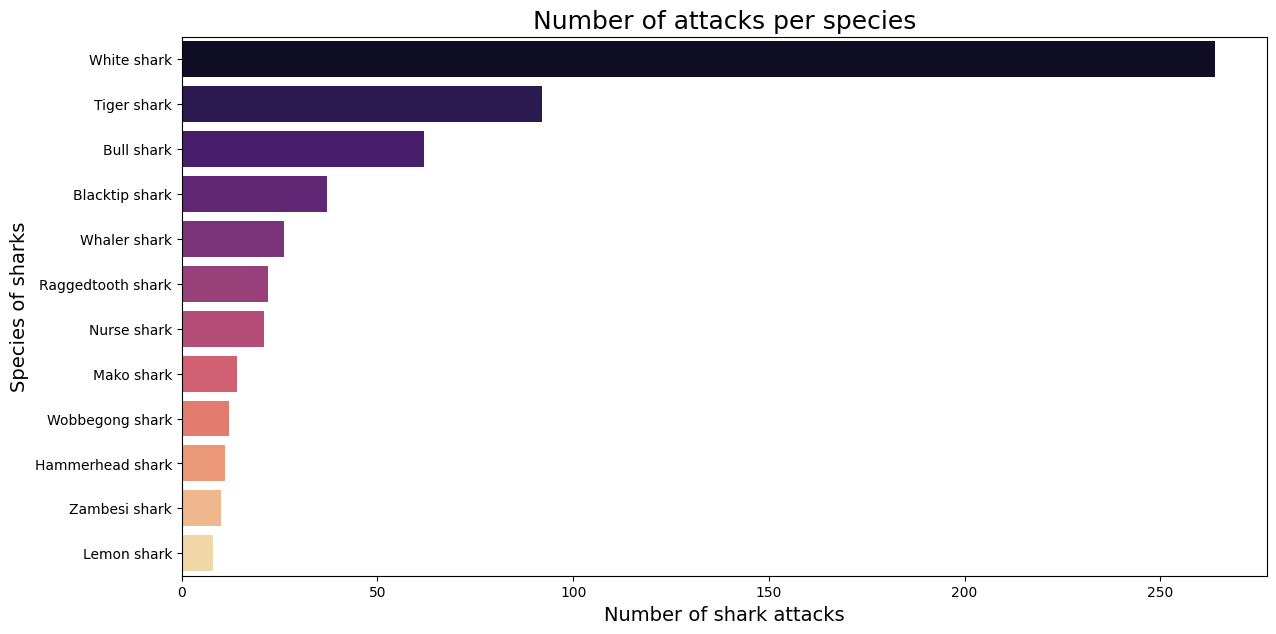

In [190]:
#Sacarme los ataques por especie
species_counts = tiburones_master_fecha.Species.value_counts().sort_values(ascending=False)
plt.figure(figsize=(14, 7), dpi=100)
sns.countplot(y=tiburones_master_fecha.Species, order=species_counts.index, palette="magma")
plt.xlabel("Number of shark attacks", size=14)
plt.ylabel("Species of sharks", size=14)
plt.title("Number of attacks per species", size=18);

plt.savefig("01_shark_attacks_per_species.png")


C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_24532\561630792.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=tiburones_filtrados['Species'], order=species_counts.index, palette="magma")


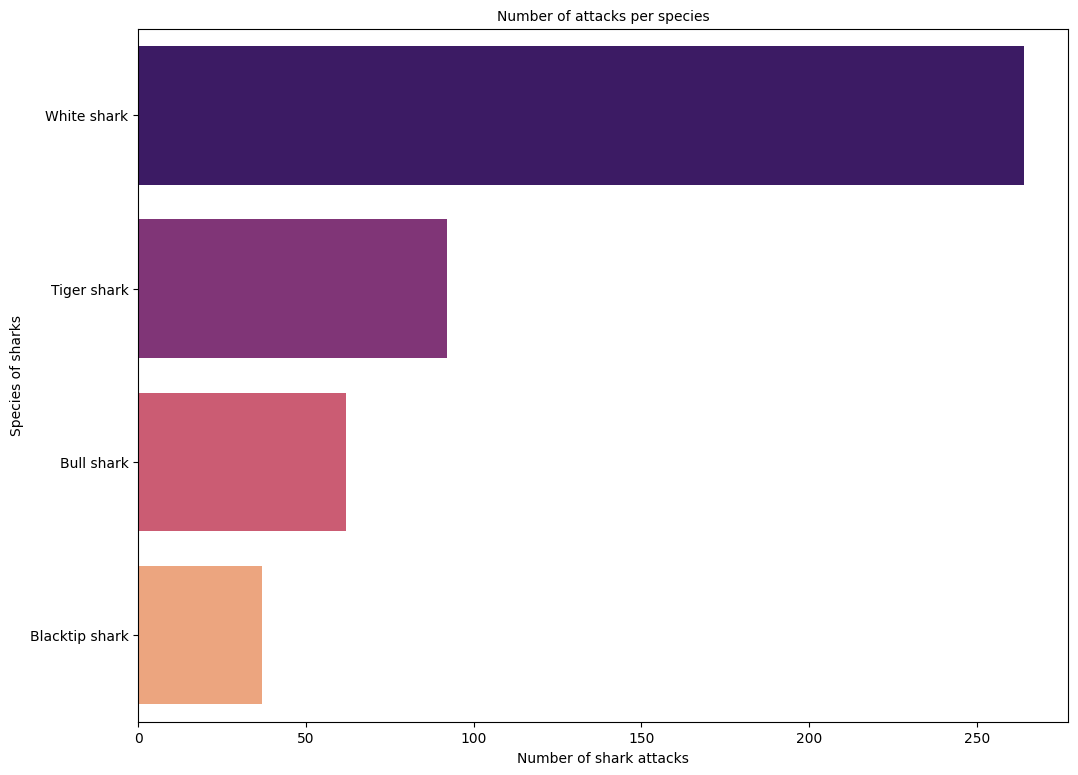

In [140]:
# Filtrar el DataFrame para incluir solo las filas correspondientes a las tres especies deseadas
especies_deseadas = ['White shark', 'Tiger shark', 'Bull shark', 'Blacktip shark']
tiburones_filtrados = tiburones_master_fecha[tiburones_master_fecha['Species'].isin(especies_deseadas)]

# Calcular el recuento de cada especie filtrada
species_counts = tiburones_filtrados['Species'].value_counts().sort_values(ascending=False)

# Ajustar el tamaño de la figura y la resolución
plt.figure(figsize=(12, 9), dpi=100)

# Crear el gráfico countplot con los datos filtrados
sns.countplot(y=tiburones_filtrados['Species'], order=species_counts.index, palette="magma")
plt.xlabel("Number of shark attacks", size=10)
plt.ylabel("Species of sharks", size=10)
plt.title("Number of attacks per species", size=10);

plt.savefig("shark_attacks_per_species_filtered.png")


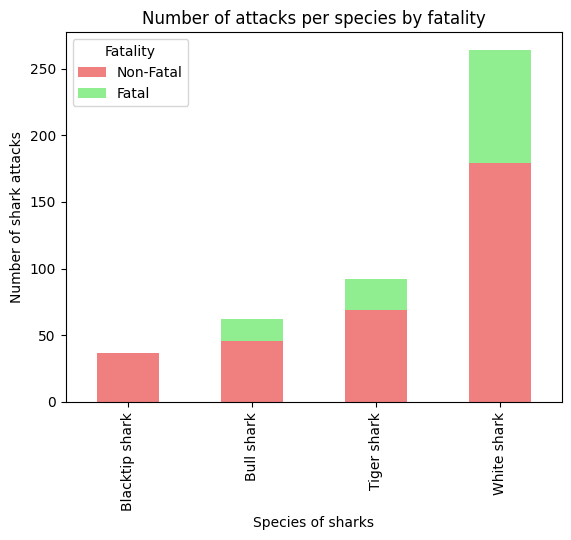

In [141]:
# Filtrar el DataFrame para incluir solo las filas correspondientes a las tres especies deseadas
especies_deseadas = ['White shark', 'Tiger shark', 'Bull shark', 'Blacktip shark']
tiburones_filtrados = tiburones_master_fecha[tiburones_master_fecha['Species'].isin(especies_deseadas)]

# Calcular el recuento de ataques fatales y no fatales para cada especie
ataques_por_especie = tiburones_filtrados.groupby(['Species', 'Fatal (Y/N)']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
ataques_por_especie.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])

plt.xlabel("Species of sharks")
plt.ylabel("Number of shark attacks")
plt.title("Number of attacks per species by fatality")

plt.legend(title="Fatality", labels=['Non-Fatal', 'Fatal'])

plt.show()

In [142]:
tiburones_master_fecha.sample()

,Day,Year,Month,Continent,Sex,Age,Activity,Species,Time,Type,Injury,Fatal (Y/N)
562,07,2017,07,Africa,F,13,Surfing,White shark,Afternoon,Unprovoked,Unharmed,N


In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el DataFrame para incluir solo las columnas relevantes
datos_verano = tiburones_master_fecha[['Month', 'Continent']]

# Contar el número de ataques por mes y continente
ataques_por_mes_cont = datos_verano.groupby(['Continent', 'Month']).size().unstack(fill_value=0)

In [144]:
ataques_por_mes_cont

Month,00,01,02,03,04,05,06,07,08,09,10,11,12
Continent,,,,,,,,,,,,,
Africa,1,28,13,5,12,8,15,11,6,7,9,10,15
Asia,0,0,0,1,3,3,0,0,0,1,0,1,1
Central America,0,2,1,1,1,0,1,3,5,3,1,1,0
Europe,0,0,1,0,0,0,0,2,0,2,1,0,0
North America,0,8,4,15,11,21,21,18,37,30,36,10,17
Oceania,0,20,26,22,16,7,6,6,9,11,16,10,23
South America,0,0,0,1,0,1,0,0,1,0,1,0,0


In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el DataFrame para incluir solo las columnas relevantes y las especies deseadas
datos_especies_deseadas = tiburones_master_fecha[tiburones_master_fecha['Species'].isin(especies_deseadas)][['Month', 'Continent', 'Species']]

# Contar el número de ataques por mes, continente y especie
ataques_por_mes_cont_especies = datos_especies_deseadas.groupby(['Continent', 'Month', 'Species']).size().unstack(fill_value=0)

# Filtrar las especies deseadas y agrupar por continente y mes
ataques_por_mes_cont = ataques_por_mes_cont_especies.groupby(['Continent', 'Month']).sum()

# Mostrar el DataFrame resultante
print(ataques_por_mes_cont)

Species                Blacktip shark  Bull shark  Tiger shark  White shark
Continent       Month                                                      
Africa          01                  2           1            3           10
                02                  1           0            1            7
                03                  1           0            0            3
                04                  0           2            0            6
                05                  0           0            1            4
                06                  0           2            0           11
                07                  0           0            0           11
                08                  0           0            0            6
                09                  0           0            0            7
                10                  0           1            0            7
                11                  0           0            1            7
            

In [155]:
tiburones_master_fecha['Type'].unique()

array(['Unprovoked', 'Provoked', 'Sea Disaster', 'Boating'], dtype=object)

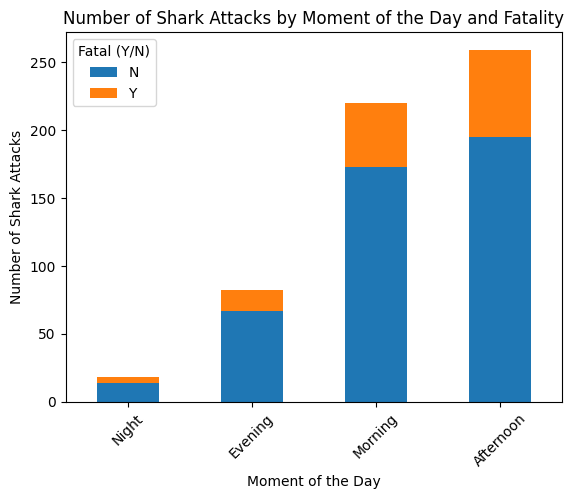

In [160]:
import matplotlib.pyplot as plt

# Contar el número de ataques por momento del día y sexo
ataques_por_momento_dia_sexo = tiburones_master_fecha.groupby(['Time', 'Fatal (Y/N)']).size().unstack(fill_value=0)

# Ordenar los momentos del día en un orden ascendente
ataques_por_momento_dia_sexo_sorted = ataques_por_momento_dia_sexo.reindex(ataques_por_momento_dia_sexo.sum(axis=1).sort_values().index)

# Graficar los resultados
ataques_por_momento_dia_sexo_sorted.plot(kind='bar', stacked=True)
plt.xlabel('Moment of the Day')
plt.ylabel('Number of Shark Attacks')
plt.title('Number of Shark Attacks by Moment of the Day and Fatality')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.legend(title='Fatal (Y/N)')
plt.show()

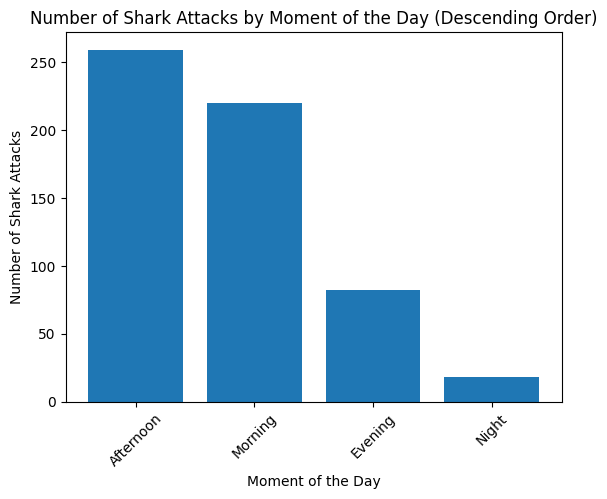

In [161]:
import matplotlib.pyplot as plt

# Contar el número de ataques por momento del día
ataques_por_momento_dia = tiburones_master_fecha.groupby('Time').size()

# Ordenar los datos en un orden descendente
ataques_por_momento_dia = ataques_por_momento_dia.sort_values(ascending=False)

# Graficar los resultados
plt.bar(ataques_por_momento_dia.index, ataques_por_momento_dia.values)
plt.xlabel('Moment of the Day')
plt.ylabel('Number of Shark Attacks')
plt.title('Number of Shark Attacks by Moment of the Day (Descending Order)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()

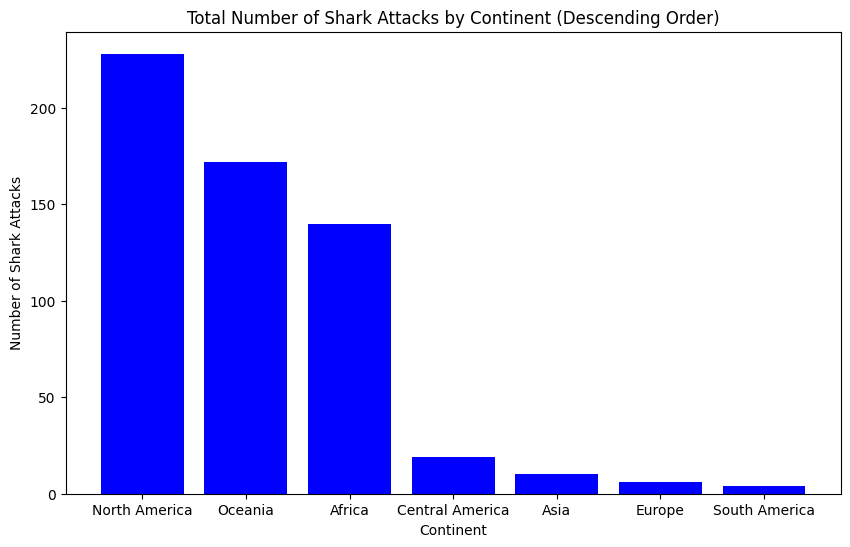

In [170]:
import matplotlib.pyplot as plt

# Obtener el número total de ataques por continente
ataques_por_continente = tiburones_master_fecha.groupby('Continent').size()

# Ordenar los datos en orden descendente
ataques_por_continente = ataques_por_continente.sort_values(ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(ataques_por_continente.index, ataques_por_continente.values, color='blue')

# Añadir etiquetas y título
plt.xlabel('Continent')
plt.ylabel('Number of Shark Attacks')
plt.title('Total Number of Shark Attacks by Continent (Descending Order)')

# Mostrar el gráfico
plt.show()

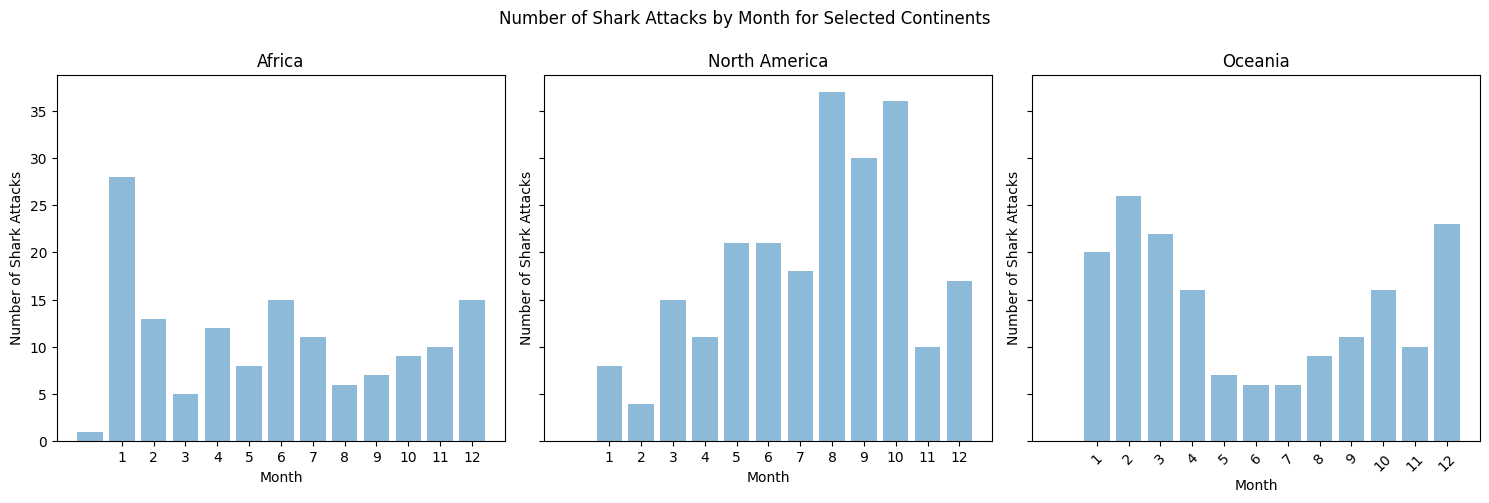

In [173]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para incluir solo los continentes deseados
continentes_deseados = ['North America', 'Africa', 'Oceania']
datos_verano = tiburones_master_fecha[tiburones_master_fecha['Continent'].isin(continentes_deseados)][['Month', 'Continent']]

# Contar el número de ataques por mes y continente
ataques_por_mes_cont = datos_verano.groupby(['Continent', 'Month']).size().unstack(fill_value=0)

# Configurar el tamaño del gráfico y la disposición de los subgráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True)

# Iterar sobre los subgráficos y trazar datos para cada continente deseado
for ax, continent in zip(axes.flatten(), ataques_por_mes_cont.index):
    ax.bar(ataques_por_mes_cont.columns, ataques_por_mes_cont.loc[continent], alpha=0.5)
    ax.set_title(continent)
    ax.set_xticks(range(1, 13))  # Establecer ubicaciones de los ticks del eje x
    ax.set_xticklabels([str(month) for month in range(1, 13)])  # Establecer etiquetas de los ticks del eje x
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Shark Attacks')

# Ajustar diseño y etiquetas
plt.suptitle("Number of Shark Attacks by Month for Selected Continents")
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

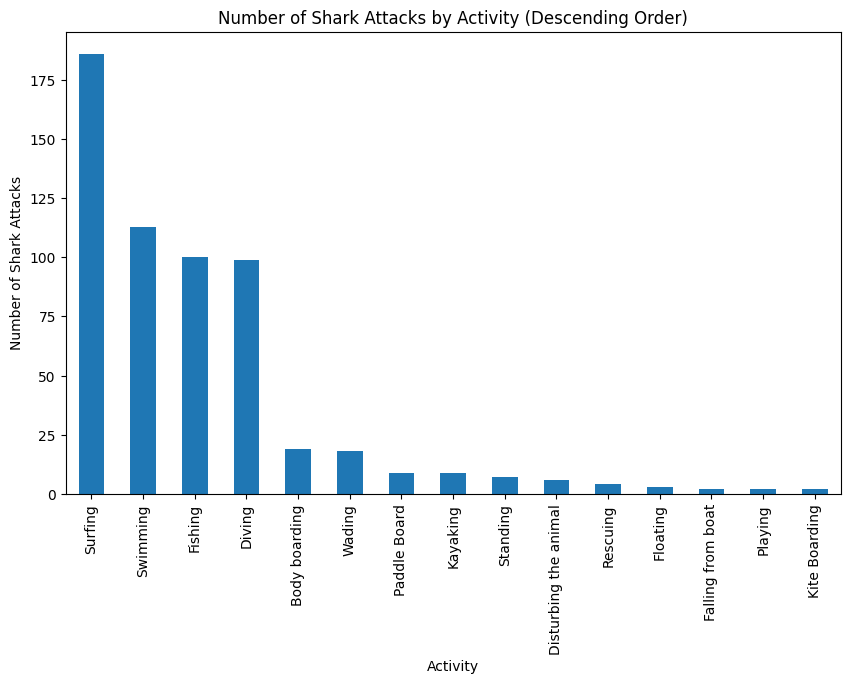

In [175]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para incluir solo las columnas relevantes
datos_actividad = tiburones_master_fecha[['Activity', 'Fatal (Y/N)']]

# Contar el número de ataques para cada actividad y ordenar en orden descendente
ataques_por_actividad = datos_actividad['Activity'].value_counts().sort_values(ascending=False)

# Graficar los resultados
plt.figure(figsize=(10, 6))
ataques_por_actividad.plot(kind='bar')
plt.xlabel('Activity')
plt.ylabel('Number of Shark Attacks')
plt.title('Number of Shark Attacks by Activity (Descending Order)')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()

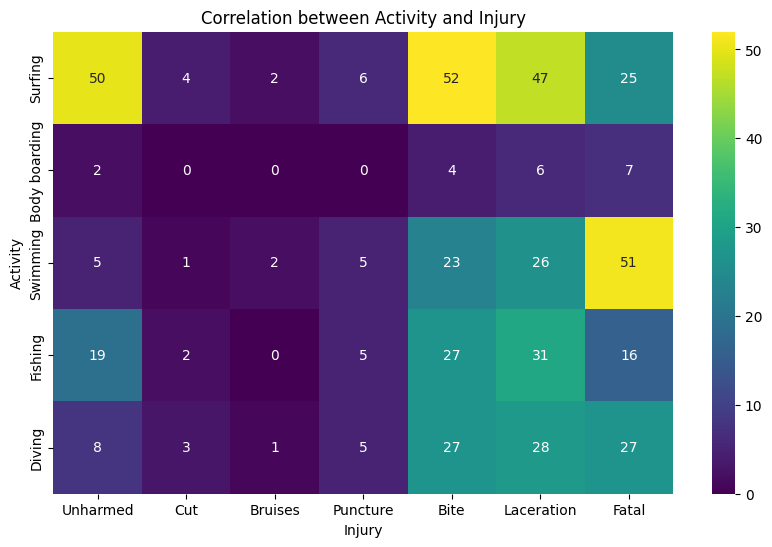

In [188]:
import seaborn as sns

# Orden deseado de las lesiones
orden_injury = ['Unharmed', 'Cut', 'Bruises', 'Puncture', 'Bite', 'Laceration', 'Fatal']

# Filtrar el DataFrame para incluir solo las actividades seleccionadas
actividades_seleccionadas = ['Surfing', 'Body boarding', 'Swimming', 'Fishing', 'Diving']
filtered_data = tiburones_master_fecha[tiburones_master_fecha['Activity'].isin(actividades_seleccionadas)]

# Crear un DataFrame pivotante para contar la frecuencia de cada combinación de actividad e Injury
pivot_table = filtered_data.pivot_table(index='Activity', columns='Injury', aggfunc='size', fill_value=0)

# Reorganizar las columnas del DataFrame pivotante según el orden deseado de las lesiones
pivot_table = pivot_table[orden_injury]

# Establecer el orden de las filas según el orden especificado
pivot_table = pivot_table.reindex(['Surfing', 'Body boarding', 'Swimming', 'Fishing', 'Diving'])

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='d')
plt.title('Correlation between Activity and Injury')
plt.xlabel('Injury')
plt.ylabel('Activity')
plt.show()

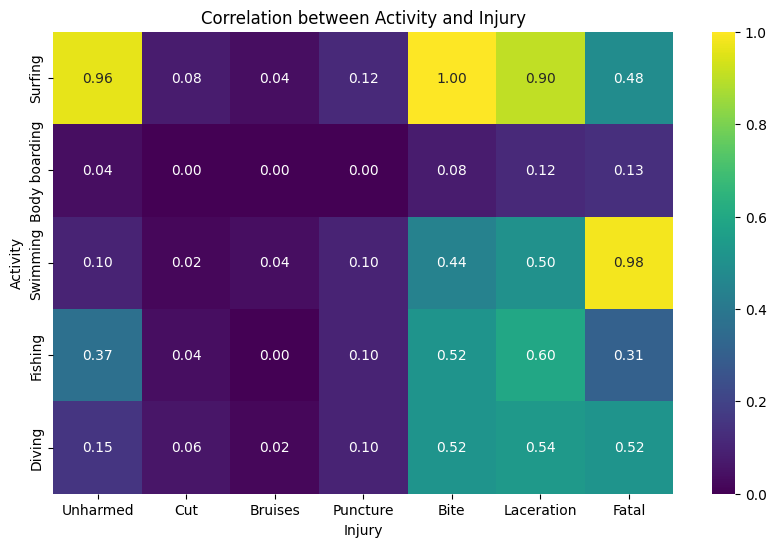

In [189]:
import seaborn as sns

# Orden deseado de las lesiones
orden_injury = ['Unharmed', 'Cut', 'Bruises', 'Puncture', 'Bite', 'Laceration', 'Fatal']

# Filtrar el DataFrame para incluir solo las actividades seleccionadas
actividades_seleccionadas = ['Surfing', 'Body boarding', 'Swimming', 'Fishing', 'Diving']
filtered_data = tiburones_master_fecha[tiburones_master_fecha['Activity'].isin(actividades_seleccionadas)]

# Crear un DataFrame pivotante para contar la frecuencia de cada combinación de actividad e Injury
pivot_table = filtered_data.pivot_table(index='Activity', columns='Injury', aggfunc='size', fill_value=0)

# Reorganizar las columnas del DataFrame pivotante según el orden deseado de las lesiones
pivot_table = pivot_table[orden_injury]

# Establecer el orden de las filas según el orden especificado
pivot_table = pivot_table.reindex(['Surfing', 'Body boarding', 'Swimming', 'Fishing', 'Diving'])

# Normalizar los valores del DataFrame pivotante para que estén en el rango de 0 a 1
pivot_table = pivot_table / pivot_table.max().max()

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.2f')
plt.title('Correlation between Activity and Injury')
plt.xlabel('Injury')
plt.ylabel('Activity')
plt.show()